# Vancouver Housing Market #

This code will preform machine learning techniques to extract information from the vancouver housing market. 

The goal of the project is to accuretly predict the cost of living in certain regions of vancouver. 

Secondly I would like to be able to idetify pentential scams. i.e. good to be true type situations

lastly, I want to make this publicly avaible through some hosting website. I need to learn more, but I beleive google has a hosting service. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### Data ####

this data was extracted using another code I wrote.

This code is working at the moment, but there are certain things I would like to improve. I.e. take data every day to accumulate data over time. 

In [2]:
#df = pd.read_csv("craigslist_combined_csv.csv")
df= pd.read_csv("craigslist_combined_csv.csv", delimiter=',', header=None, skiprows=1, names=['latitude','longitude','accuracy','bed', 'bath','sqft','price','name'])
df.head()

,latitude,longitude,accuracy,bed,bath,sqft,price,name
0,49.102877,-122.667708,5,2,1.0,920,1500,"Fitness facility, Laundry facilities, Private ..."
1,49.230338,-122.981198,10,1,1.0,700,1395,Metrotown-Deer Lake-Level bsmt suite-incl all ...
2,49.160070,-123.143606,5,1,1.0,750,1400,Dorchester Circle
3,49.248000,-123.091300,25,1,1.0,550,1400,* Lovely little 1 bedroom Suite For Rent - Aug...
4,49.235288,-123.027488,5,1,1.0,500,1450,Vancouver 1 Bedroom Joyce station


In [3]:
df.info()
housing = df.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10347 entries, 0 to 1731
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   10347 non-null  float64
 1   longitude  10347 non-null  float64
 2   accuracy   10347 non-null  int64  
 3   bed        10347 non-null  int64  
 4   bath       10347 non-null  float64
 5   sqft       10347 non-null  int64  
 6   price      10347 non-null  int64  
 7   name       10347 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 727.5+ KB


In [4]:
housing = housing.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10347 entries, 0 to 1731
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   10347 non-null  float64
 1   longitude  10347 non-null  float64
 2   accuracy   10347 non-null  int64  
 3   bed        10347 non-null  int64  
 4   bath       10347 non-null  float64
 5   sqft       10347 non-null  int64  
 6   price      10347 non-null  int64  
 7   name       10347 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 727.5+ KB


In [5]:
housing.drop_duplicates(subset = "name", keep='first',inplace = True)
housing.isnull().values.any()

False

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7942 entries, 0 to 1728
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   7942 non-null   float64
 1   longitude  7942 non-null   float64
 2   accuracy   7942 non-null   int64  
 3   bed        7942 non-null   int64  
 4   bath       7942 non-null   float64
 5   sqft       7942 non-null   int64  
 6   price      7942 non-null   int64  
 7   name       7942 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 558.4+ KB


#### remove name from information ####

At this moment I don't see how the name can be quantized therefore i will remove the information

In [7]:
housing.drop("name", axis = 1, inplace = True)

In [8]:
#housing['accuracy']=housing['accuracy'].astype(float)
#housing['bed']=housing['bed'].astype(float)
#housing['sqft']=housing['sqft'].astype(float)
#housing['price']=housing['price'].astype(float)

In [9]:
housing.head()

,latitude,longitude,accuracy,bed,bath,sqft,price
0,49.102877,-122.667708,5,2,1.0,920,1500
1,49.230338,-122.981198,10,1,1.0,700,1395
2,49.160070,-123.143606,5,1,1.0,750,1400
3,49.248000,-123.091300,25,1,1.0,550,1400
4,49.235288,-123.027488,5,1,1.0,500,1450


#### Plots ####

These first plots indicate that, the max price is 2000 this is what the data extraction program was degsigned to do. I want to further expand this later on, to encompass all rental property listen on craigslist.

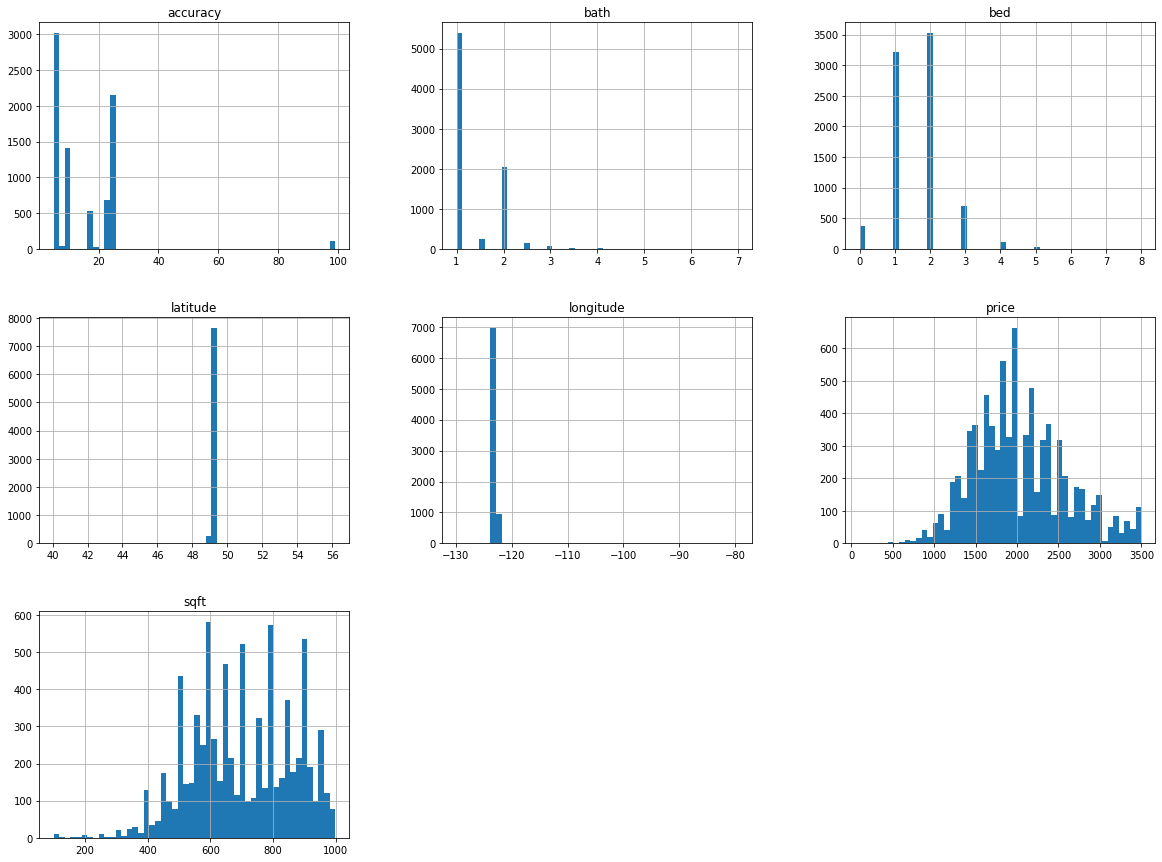

In [10]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Create a Test Set #

After the preiliminary observation, I will split the data into training and test data.

Using a random state of 42 to ensure we split the data the same way each time.

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size = 0.2,random_state = 42)

#### Sample Bias ####

since we have a small data set, we might run into a sample bias. To combat this as best as possible, cut the data into a price catagory. 

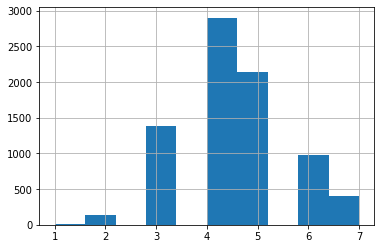

In [12]:
housing["price_cat"] = pd.cut(housing["price"],bins =[0.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0,3500.0,np.inf],labels=[1,2,3,4,5,6,7,8])
housing["price_cat"].hist()

In [13]:
housing.reset_index(drop=True,inplace=True)
housing.head()

,latitude,longitude,accuracy,bed,bath,sqft,price,price_cat
0,49.102877,-122.667708,5,2,1.0,920,1500,3
1,49.230338,-122.981198,10,1,1.0,700,1395,3
2,49.160070,-123.143606,5,1,1.0,750,1400,3
3,49.248000,-123.091300,25,1,1.0,550,1400,3
4,49.235288,-123.027488,5,1,1.0,500,1450,3


#### stratified sampling ####

stratify the data to get a well distributed train/test dataset with hopfully no bias occuring. 

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

#NOtE: this data needs to have the index reset! else it will give an error.
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing,housing["price_cat"]):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [15]:
start_test_set["price_cat"].value_counts()

4    581
5    429
3    276
6    194
7     80
2     28
1      1
8      0
Name: price_cat, dtype: int64

In [16]:
start_test_set["price_cat"].value_counts() / len(start_test_set)

4    0.365639
5    0.269981
3    0.173694
6    0.122089
7    0.050346
2    0.017621
1    0.000629
8    0.000000
Name: price_cat, dtype: float64

the precent distribution of the cost of rent, is well distributed for the test set data.

#### Reset data

here im just removing the price_cat beause i want the data to look like the original set. 

In [17]:
for set_ in (start_train_set, start_test_set):
    set_.drop("price_cat",axis=1, inplace=True)

# Visulize the Data #

since we have geographical information, we can plot this on a graph to see what it looks like. 

In [18]:
housing = start_train_set.copy()

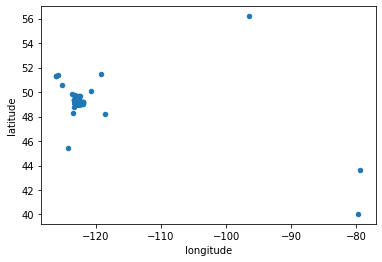

In [19]:
housing.plot(kind="scatter",x="longitude",y="latitude")

#### Refine Data ####

need to remove data that is not within the vancouver area. This will be based on lat a long quardinates

In [20]:
for latitude in housing["latitude"]:
    if latitude < 49.19 or latitude > 49.3:
        x = housing.index[housing["latitude"] == latitude].tolist()
        housing.drop([x[0]],axis=0,inplace=True)
for longitude in housing["longitude"]:
    if longitude > -123.00 or longitude < -123.25:
        y = housing.index[housing["longitude"] == longitude].tolist()
        
        housing.drop([y[0]],axis=0,inplace=True)
    

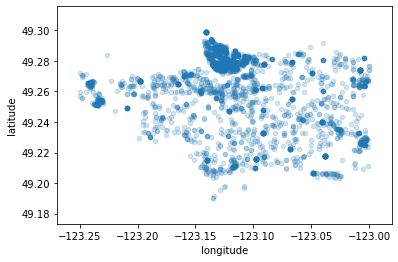

In [21]:
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.2)

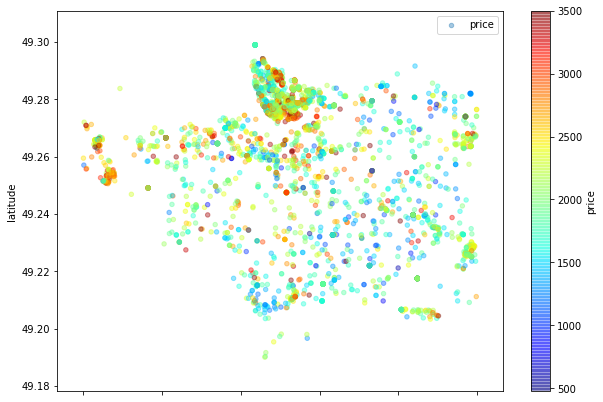

In [22]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4, 
             label = "price", figsize=(10,7),
            c="price",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

So this is pretty interesting UBC is a univerity and it has super high rates for rent, which is total bs. No wonder being a student here is extremly expensive.

There are a couple area's that we can see are expeinsive. along false creek (lat 49.26) downtown yaletown (lat 49.27) it also looks like metrotown (lat 49.22) and burnaby downtown (lat 49.26) are expensive

# Statistics #

so it is obvious that from the data visulisation above that there is little to no information that can be imediaitly seen. so i'll extrat extra information, like corrolation and try to develop other attrubites that are more meaning full i.e price/sqft... etc

In [23]:
corr_matrix = housing.corr()
corr_matrix

,latitude,longitude,accuracy,bed,bath,sqft,price
latitude,1.000000,-0.261317,0.005452,-0.091281,-0.007547,0.098884,0.206988
longitude,-0.261317,1.000000,-0.028464,-0.024178,-0.015669,-0.082495,-0.208219
accuracy,0.005452,-0.028464,1.000000,-0.027187,-0.015119,-0.034758,-0.046017
bed,-0.091281,-0.024178,-0.027187,1.000000,0.597260,0.183588,0.453644
bath,-0.007547,-0.015669,-0.015119,0.597260,1.000000,0.222046,0.547418
sqft,0.098884,-0.082495,-0.034758,0.183588,0.222046,1.000000,0.381759
price,0.206988,-0.208219,-0.046017,0.453644,0.547418,0.381759,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019AFE3CAB48>,
      dtype=object)

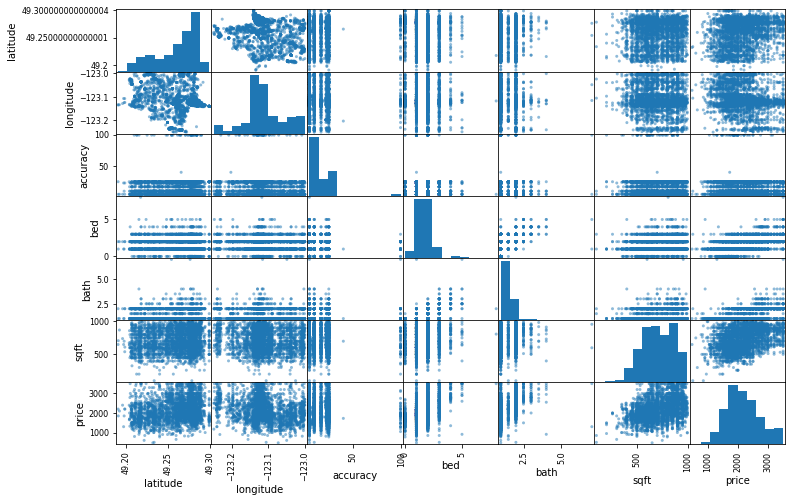

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing,figsize=(12,8))

Went back and took a lot more data and now we can see come corr happening, they are not very strong however this they are corrolations we expect. such as increase in sqft increase in price.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A815C92C8>,
      dtype=object)

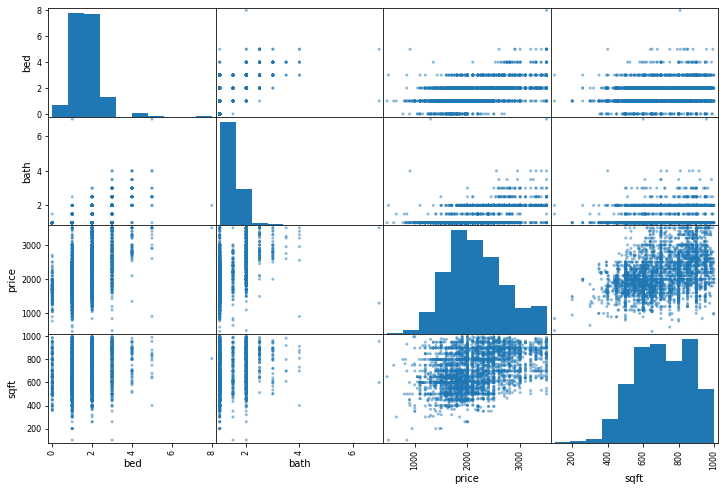

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["bed","bath","price","sqft"]
scatter_matrix(housing[attributes],figsize=(12,8))

#### Attribute combinations ####

Here I will look at different attribute combinations to maybe uncover different corrolations that might be present.

In [26]:
housing["price_per_sqft"] = housing["price"]/housing["sqft"]
housing["price_per_bed"] = housing["price"]/housing["bed"]
housing["price_per_bath"] = housing["price"]/housing["bath"]


In [27]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price             1.000000
bath              0.547418
price_per_sqft    0.545735
bed               0.453644
sqft              0.381759
price_per_bath    0.263603
latitude          0.206988
price_per_bed     0.198959
accuracy         -0.046017
longitude        -0.208219
Name: price, dtype: float64

# Prepare the data for ML 

first revert the data to the clean training set.

In [28]:
housing = start_train_set.drop("price",axis=1)
housing_labels = start_train_set["price"].copy()
housing.head()

,latitude,longitude,accuracy,bed,bath,sqft
5816,49.259022,-123.144872,25,1,1.0,900
973,49.257814,-123.127037,23,2,1.0,668
7578,49.278260,-123.114917,5,2,2.0,988
1703,49.280996,-123.136925,5,1,1.0,479
2428,49.282389,-122.797097,17,1,1.0,640


#### data cleaning ####

remove data such as objects. 

There is no nan data, this is done because in order to have certain attibutes from craigslist I needed to use specific limiters to gain useable data.

The object data "name" is only used to reduce the number of duplicate posts. (however, maybe I should remove duplicate data based on all attributres, I might revisit this idea later)

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
X=imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns, index=housing.index)

In [31]:
housing_tr.head()

,latitude,longitude,accuracy,bed,bath,sqft
5816,49.259022,-123.144872,25.0,1.0,1.0,900.0
973,49.257814,-123.127037,23.0,2.0,1.0,668.0
7578,49.278260,-123.114917,5.0,2.0,2.0,988.0
1703,49.280996,-123.136925,5.0,1.0,1.0,479.0
2428,49.282389,-122.797097,17.0,1.0,1.0,640.0


#### custom transforms ####

good practice for future expandibility

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

bed_ix, bath_ix, sqft_ix = 3,4,5

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self # nothing else to do
    def transform(self,X):
        beds_per_sqft = X[:,bed_ix] / X[:, sqft_ix]
        bath_per_sqft = X[:,bath_ix] / X[:,sqft_ix]
        bed_per_bath = X[:,bed_ix] / X[:,bath_ix]
        return np.c_[X,beds_per_sqft, bath_per_sqft,bed_per_bath]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [33]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["beds_per_sqft","bath_per_sqft","bed_per_bath"],
    index=housing.index)
housing_extra_attribs.head()

,latitude,longitude,accuracy,bed,bath,sqft,beds_per_sqft,bath_per_sqft,bed_per_bath
5816,49.259022,-123.144872,25.0,1.0,1.0,900.0,0.001111,0.001111,1.0
973,49.257814,-123.127037,23.0,2.0,1.0,668.0,0.002994,0.001497,2.0
7578,49.278260,-123.114917,5.0,2.0,2.0,988.0,0.002024,0.002024,1.0
1703,49.280996,-123.136925,5.0,1.0,1.0,479.0,0.002088,0.002088,1.0
2428,49.282389,-122.797097,17.0,1.0,1.0,640.0,0.001563,0.001563,1.0


#### Transformation pipelines ####

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_attribs = list(housing)
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('str_scaler', StandardScaler())])

housing_prepared = num_pipeline.fit_transform(housing)

In [41]:
housing_prepared

array([[ 0.11332909, -0.16229792,  0.77116593, ..., -0.9681142 ,
        -0.93668209, -0.44501455],
       [ 0.10694431, -0.14155152,  0.61813235, ...,  0.40882987,
        -0.5280362 ,  1.25381589],
       [ 0.21500982, -0.12745304, -0.75916991, ..., -0.30031573,
         0.03033622, -0.44501455],
       ...,
       [-0.06876388, -0.14355229, -0.75916991, ...,  1.26637897,
         0.09285895,  1.25381589],
       [ 0.17918002, -0.17739678, -0.37658595, ..., -0.83705888,
        -0.74690494, -0.44501455],
       [-0.11487909, -0.06283037, -0.75916991, ..., -0.56184272,
        -0.34837292, -0.44501455]])

# Select and train model #

lets look at the linear regression

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)
print("prediction:", lin_reg.predict(some_data_prepared))

prediction: [1945.48590982 1881.48433904 2589.50820737 1690.53611332 1793.40216968]


In [44]:
print("Labels:", list(some_labels))

Labels: [2334, 1500, 2590, 1700, 1665]


#### root mean squared error #####

In [45]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

431.6587270501282

So we have an error of around $431 which is a fair amount when it comes to rent.

#### Decision TreeRegression ####

So this will hopefully give me a better model, because this one is fairly complex.

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [47]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

36.890266250840824

This is good, we are not over fitting the error because we are still getting an error in our prediction. but we should use cross valodation to further understand the data.

#### Cross Validation ####

the above error was rather nice. However, it is a good idea to do cross validation.

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [57]:
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [58]:
display_scores(tree_rmse_scores)

scores: [504.15206027 521.21819106 486.24230501 517.35383374 504.88659049
 504.37187277 532.7408952  541.70097578 504.26516584 504.38392234]
mean: 512.1315812507886
Standard Deviation: 15.419041373116686


Ok, so the tree is preforming worse than the linear model. The error is around $512+-15 for each trial.

In [59]:
lin_score = cross_val_score(lin_reg,housing_prepared,housing_labels,
                           scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_score)
display_scores(lin_rmse_scores)

scores: [417.63697831 439.76087865 430.8417632  420.80570168 467.9038805
 459.92710962 429.01873624 447.47334894 428.82163454 432.3146506 ]
mean: 437.4504682269615
Standard Deviation: 15.568015214768261


Yes the linear model is preforming better, and their errors are not over laping, so we can say with confidence the linear model is better here.


#### RandomForestRegressor ####

this will be one last model that we will use.

RandomForestRegressor train many Decision Trees on random subsets of the features and averages out their predictions. 

Building a model on top of many other models is called ENSEMBLE LEARNING it is often a great way to push machine learnig algorigthms even further. 

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(housing_prepared,housing_labels)
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

143.58252652348526

In [61]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [347.45773326 385.38114444 370.62696402 378.33761582 367.49899765
 398.20902795 382.0858061  392.41989189 383.56719264 377.66303116]
mean: 378.32474049066855
Standard Deviation: 13.47272269226804


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [63]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [64]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

429.61434928027904 {'max_features': 2, 'n_estimators': 3}
389.5152204680441 {'max_features': 2, 'n_estimators': 10}
378.7288934934963 {'max_features': 2, 'n_estimators': 30}
431.22164084170083 {'max_features': 4, 'n_estimators': 3}
391.5634443627926 {'max_features': 4, 'n_estimators': 10}
378.1625564772726 {'max_features': 4, 'n_estimators': 30}
426.7552569910641 {'max_features': 6, 'n_estimators': 3}
391.48767240922047 {'max_features': 6, 'n_estimators': 10}
380.31523599555766 {'max_features': 6, 'n_estimators': 30}
431.3659255408626 {'max_features': 8, 'n_estimators': 3}
392.3274124151116 {'max_features': 8, 'n_estimators': 10}
383.73946099380555 {'max_features': 8, 'n_estimators': 30}
432.7373047727988 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
398.059005155894 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
435.3600692038806 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
400.46038989890997 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [66]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([0.16003321, 0.18966021, 0.03869593, 0.057254  , 0.18398182,
       0.12051303, 0.07796323, 0.1534632 , 0.01843537])

In [70]:
extra_attribs = ["beds_per_sqft","bath_per_sqft","bed_per_bath"]
#cat_encoder = full_pipeline.named_transformers_["cat"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs
sorted(zip(feature_importance,attributes),reverse=True)

[(0.18966021418305798, 'longitude'),
 (0.18398181950259704, 'bath'),
 (0.16003321143004323, 'latitude'),
 (0.1534631962368857, 'bath_per_sqft'),
 (0.12051303100713645, 'sqft'),
 (0.07796322892459748, 'beds_per_sqft'),
 (0.057253999951269625, 'bed'),
 (0.03869592983517371, 'accuracy'),
 (0.018435368929238596, 'bed_per_bath')]

In [72]:
final_model = grid_search.best_estimator_

X_test = start_test_set.drop("price", axis=1)
y_test = start_test_set["price"].copy()

X_test_prepared = num_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)

final_rmse = np.sqrt(final_mse)

In [73]:
final_rmse

380.51874660052766

In [74]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([362.89610851, 397.36060129])